# Importing libraries and datasets

In [78]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
indicators16 = pd.read_csv("../Data/Clean/indicators2016.csv")
indicators17 = pd.read_csv("../Data/Clean/indicators2017.csv")
indicators18 = pd.read_csv("../Data/Clean/indicators2018.csv")
indicators19 = pd.read_csv("../Data/Clean/indicators2019.csv")
indicators20 = pd.read_csv("../Data/Clean/indicators2020.csv")

In [4]:
# Setting country as index
indicators16.set_index("countryname", inplace=True)
indicators17.set_index("country", inplace=True)
indicators18.set_index("country", inplace=True)
indicators19.set_index("Country", inplace=True)
indicators20.set_index("Country", inplace=True)

# Scaling the data

In [5]:
scaler = MinMaxScaler(feature_range=(1,100))

In [6]:
indicators16 = pd.DataFrame(scaler.fit_transform(indicators16),columns = indicators16.columns, index=indicators16.index)

In [7]:
# Transforming the n.d. values to NaN
indicators17 = indicators17.replace("n.d.", np.nan)

In [8]:
indicators17 = pd.DataFrame(scaler.fit_transform(indicators17),columns = indicators17.columns, index=indicators17.index)

In [9]:
indicators18 = pd.DataFrame(scaler.fit_transform(indicators18),columns = indicators18.columns, index=indicators18.index)

In [10]:
indicators19 = pd.DataFrame(scaler.fit_transform(indicators19),columns = indicators19.columns, index=indicators19.index)

In [11]:
indicators20 = pd.DataFrame(scaler.fit_transform(indicators20),columns = indicators20.columns, index=indicators20.index)

## Dealing with ascending and descending variables

In [12]:
# Ascendent is more value better, descendent is less value better
ascendent = ['sdg2_crlyld', 'sdg2_yieldgap', 'sdg3_lifee', 'sdg3_uhc', 'sdg3_births', 'sdg3_vac', 'sdg4_primary',
            'sdg4_second', 'sdg4_literacy', 'sdg4_tertiary', 'sdg4_pisa', 'sdg4_resil', 'sdg5_parl', 'sdg6_safewat', 
             'sdg6_safesan', 'sdg7_elecac', 'sdg7_cleanfuel', 'sdg8_adjgrowth', 'sdg8_slavery', 'sdg8_accounts',
             'sdg8_empop', 'sdg9_intuse', 'sdg9_mobuse', 'sdg9_patents', 'sdg9_netacc', 'sdg9_womensci', 
             'sdg11_pipedwat', 'sdg11_transport', 'sdg9_articles', 'sdg15_cpta', 'sdg15_cpfa', 'sdg16_safe', 
             'sdg17_govex', 'sdg17_govrev', 'sdg3_swb', 'sdg4_earlyedu', 'sdg5_edat', 'sdg5_lfpr', 'sdg6_water', 
             'sdg6_sanita', 'sdg6_freshwat', 'sdg6_wastewat', 'sdg7_ren', 'sdg9_lpi', 'sdg9_qs', 'sdg9_rdex', 'sdg9_rdres',
             'sdg13_ecr', 'sdg14_cpma', 'sdg14_cleanwat', 'sdg15_redlist', 'sdg16_prs', 'sdg16_u5reg', 'sdg16_cpi',
             'sdg17_oda', "sdg4_schlyrs"] 
                         
             
descendent = ['sdg1_wpc', 'sdg1_320pov', 'sdg1_oecdpov', 'sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 
              'sdg2_obesity', 'sdg2_trophic', 'sdg2_snmi', 'sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 
              'sdg3_tb','sdg3_hiv', 'sdg3_ncds', 'sdg3_pollmort', 'sdg3_traffic','sdg17_cohaven', 'sdg16_prison',
              'sdg16_homicides', 'sdg16_clabor', 'sdg16_weaponsexp', 'sdg3_fertility', 'sdg3_region', 'sdg3_smoke',
              'sdg3_incomeg', 'sdg4_socioec', 'sdg4_science', 'sdg5_familypl', 'sdg5_paygap', 'sdg5_unpaid', 'sdg7_co2twh',
              'sdg8_unemp', 'sdg8_impacc', 'sdg8_yneet', 'sdg10_adjgini', 'sdg10_palma', 'sdg10_elder', 'sdg11_pm25', 
              'sdg11_rentover', 'sdg12_msw', 'sdg12_ewaste', 'sdg12_so2prod', 'sdg12_so2import', 'sdg12_prodnitro', 
              'sdg12_reacnitro', 'sdg12_mswrecycl', 'sdg13_co2pc', 'sdg13_co2import', 'sdg13_co2export', 'sdg14_fishstocks',
              'sdg14_trawl', 'sdg15_forchg', 'sdg16_detain', 'sdg16_rsf', 'sdg17_secrecy', 'sdg6_scarcew', "sdg14_biomar",
              "sdg15_biofrwter", "sdg17_sprofit"]

Expressing all the indicators as ascendent

In [13]:
for i in indicators16:
    if i in descendent:
        indicators16[i] = 100 - indicators16[i]

In [14]:
for i in indicators17:
    if i in descendent:
        indicators17[i] = 100 - indicators17[i]

In [15]:
for i in indicators18:
    if i in descendent:
        indicators18[i] = 100 - indicators18[i]

In [16]:
for i in indicators19:
    if i in descendent:
        indicators19[i] = 100 - indicators19[i]

In [17]:
for i in indicators20:
    if i in descendent:
        indicators20[i] = 100 - indicators20[i]

### Imputing the missing data with nearest neighbour imputation

In [18]:
#Defining the imputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [19]:
# transform the 2016 dataset
indicators16 = pd.DataFrame(imputer.fit_transform(indicators16),columns = indicators16.columns, index=indicators16.index)

In [20]:
# transform the 2017 dataset
indicators17 = pd.DataFrame(imputer.fit_transform(indicators17),columns = indicators17.columns, index=indicators17.index)

In [21]:
# transform the 2018 dataset
indicators18 = pd.DataFrame(imputer.fit_transform(indicators18),columns = indicators18.columns, index=indicators18.index)

In [22]:
# transform the dataset
indicators19 = pd.DataFrame(imputer.fit_transform(indicators19),columns = indicators19.columns, index=indicators19.index)

In [23]:
# transform the dataset
indicators20 = pd.DataFrame(imputer.fit_transform(indicators20),columns = indicators20.columns, index=indicators20.index)

# Calculating each goal score

2016

In [24]:
# Calculating goal scores
indicators16["sdg1_score"] = indicators16[["sdg1_wpc","sdg1_oecdpov"]].mean(axis=1)
indicators16["sdg2_score"] = indicators16[['sdg2_crlyld', 'sdg2_snmi', 'sdg2_obesity','sdg2_stunting', 'sdg2_undernsh', 'sdg2_wasting']].mean(axis=1)
indicators16["sdg3_score"] = indicators16[['sdg3_fertility','sdg3_lifee', 'sdg3_matmort', 'sdg3_neonat', 'sdg3_phys', 'sdg3_smoke','sdg3_swb', 'sdg3_tb', 'sdg3_traffic', 'sdg3_u5mort', 'sdg3_vac']].mean(axis=1)
indicators16["sdg4_score"] = indicators16[['sdg4_literacy', 'sdg4_pisa', 'sdg4_primary', 'sdg4_schlyrs','sdg4_tertiary', 'sdg4_upsec']].mean(axis=1)
indicators16["sdg5_score"] = indicators16[['sdg5_contra', 'sdg5_edat', 'sdg5_lfpr','sdg5_parl', 'sdg5_paygap']].mean(axis=1)
indicators16["sdg6_score"] = indicators16[['sdg6_freshwat', 'sdg6_water','sdg6_sanita']].mean(axis=1)
indicators16["sdg7_score"] = indicators16[['sdg7_elecac', 'sdg7_cleanfuel','sdg7_ren', 'sdg8_adjgrowth']].mean(axis=1)
indicators16["sdg8_score"] = indicators16[['sdg8_adjgrowth', 'sdg8_atms', 'sdg8_clabor_im','sdg8_empop', 'sdg8_unemp', 'sdg8_yneet']].mean(axis=1)
indicators16["sdg9_score"] = indicators16[['sdg9_infrqual','sdg9_intuse', 'sdg9_lpi', 'sdg9_mobuse', 'sdg9_patents', 'sdg9_rdres','sdg9_rdres.1']].mean(axis=1)
indicators16["sdg10_score"] = indicators16[['sdg10_adjgini', 'sdg10_justice', 'sdg10_palma']].mean(axis=1)
indicators16["sdg11_score"] = indicators16[['sdg11_pipedwat', 'sdg11_pm25', 'sdg11_rooms']].mean(axis=1)
indicators16["sdg12_score"] = indicators16[['sdg12_msw','sdg12_mswrecycl', 'sdg12_wastewat']].mean(axis=1)
indicators16["sdg13_score"] = indicators16[['sdg13_ccvm', 'sdg13_co2pc']].mean(axis=1)
indicators16["sdg14_score"] = indicators16[['sdg14_biodiv', 'sdg14_cleanwat', 'sdg14_cpma', 'sdg14_fish','sdg14_fishstocks']].mean(axis=1)
indicators16["sdg15_score"] = indicators16[['sdg15_cpta', 'sdg15_forchg', 'sdg15_redlist']].mean(axis=1)
indicators16["sdg16_score"] = indicators16[['sdg16_cpi', 'sdg16_goveff', 'sdg16_homicides', 'sdg16_prison','sdg16_prs', 'sdg16_safe', 'sdg16_u5reg']].mean(axis=1)
indicators16["sdg17_score"] = indicators16[['sdg17_govrev','sdg17_govspd', 'sdg17_oda']].mean(axis=1)
indicators16["total_score"] = indicators16.mean(axis=1)

In [25]:
# Creating column with ranking
goal_scores16 = ['sdg1_score', 'sdg2_score', 'sdg3_score',
       'sdg4_score', 'sdg5_score', 'sdg6_score', 'sdg7_score', 'sdg8_score',
       'sdg9_score', 'sdg10_score', 'sdg11_score', 'sdg12_score',
       'sdg13_score', 'sdg14_score', 'sdg15_score', 'sdg16_score',
       'sdg17_score']

tups = indicators16[goal_scores16].sort_values(goal_scores16, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators16 = indicators16.assign(rank=factorized)

In [27]:
# Placing the rank column at the beggining and ordering the countries by rank
cols16 = list(indicators16.columns)
cols16 = [cols16[-1]] + cols16[:-1]
indicators16 = indicators16[cols16]
indicators16.sort_values("rank")

,total_score,rank,sdg1_wpc,sdg1_oecdpov,sdg2_crlyld,sdg2_snmi,sdg2_obesity,sdg2_stunting,sdg2_undernsh,sdg2_wasting,...,sdg8_score,sdg9_score,sdg10_score,sdg11_score,sdg12_score,sdg13_score,sdg14_score,sdg15_score,sdg16_score,sdg17_score
countryname,,,,,,,,,,,,,,,,,,,,,
Denmark,77.128419,1,99.000000,99.00,57.542406,88.959770,57.355164,94.523478,99.000000,91.690654,...,56.119472,78.746263,95.112347,83.651934,71.238046,50.119201,64.588324,91.046575,90.158850,66.837555
Iceland,73.751627,2,99.000000,99.00,59.814535,80.646397,48.627204,93.283826,99.000000,92.615888,...,63.610834,65.383564,87.075832,77.021975,71.867870,48.104007,49.596315,58.267176,87.997785,43.818752
Czech Republic,67.448571,3,99.000000,99.00,54.228637,83.389597,38.652393,94.523478,99.000000,77.719626,...,51.715923,47.278844,90.890882,70.007193,82.828982,39.466970,65.225725,80.496171,74.014329,34.701904
Hungary,62.369242,4,99.000000,92.40,51.449370,91.405487,45.634761,87.843130,99.000000,86.231776,...,46.316216,40.591325,65.386788,63.020888,63.681825,45.731426,66.022503,69.322977,64.037229,37.458043
Luxembourg,69.609886,5,99.000000,92.40,51.780750,55.711560,47.879093,94.798957,99.000000,92.708411,...,58.611976,60.226984,82.519237,84.107752,72.207496,26.512686,56.488790,64.665788,89.259026,61.401483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malawi,45.793555,145,13.137840,39.60,19.523551,51.354358,92.267003,25.998261,61.981619,81.420561,...,48.105109,13.487670,40.860639,44.381432,52.202172,98.256308,54.872804,76.588534,49.221251,38.748608
Burundi,44.894088,146,4.976640,44.88,12.135993,40.835310,99.000000,0.000000,58.645607,70.780374,...,43.199463,10.404255,55.057157,45.856611,49.937031,75.928571,54.734873,76.739148,52.457323,32.459995
Mozambique,42.802736,147,15.765416,30.36,6.740141,38.729997,92.267003,24.793043,53.262496,70.780374,...,34.231071,9.748235,38.585274,43.022578,53.275503,75.804995,77.826740,65.858231,52.643689,31.243720


2017

In [28]:
# Calculating each goal score

indicators17["sdg1_score"] = indicators17["sdg1_wpc"].mean()
indicators17["sdg2_score"] = indicators17[['sdg2_crlyld', 'sdg2_snmi', 'sdg2_obesity', 'sdg2_stunting','sdg2_undernsh', 'sdg2_wasting']].mean(axis=1)
indicators17["sdg3_score"] = indicators17[['sdg3_births', 'sdg3_fertility','sdg3_lifee', 'sdg3_hiv', 'sdg3_matmort', 'sdg3_ncds', 'sdg3_neonat','sdg3_pollmort', 'sdg3_smoke', 'sdg3_swb', 'sdg3_tb', 'sdg3_traffic','sdg3_u5mort', 'sdg3_uhc', 'sdg3_vac']].mean(axis=1)
indicators17["sdg4_score"] = indicators17[['sdg4_literacy', 'sdg4_pisa','sdg4_primary', 'sdg4_schlyrs', 'sdg4_tertiary']].mean(axis=1)
indicators17["sdg5_score"] = indicators17[['sdg5_edat', 'sdg5_lfpr', 'sdg5_parl', 'sdg5_paygap']].mean(axis=1)
indicators17["sdg6_score"] = indicators17[['sdg6_freshwat','sdg6_scarcew', 'sdg6_sanita', 'sdg6_water', 'sdg6_wastewat']].mean(axis=1)
indicators17["sdg7_score"] = indicators17[['sdg7_co2twh','sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_ren']].mean(axis=1)
indicators17["sdg8_score"] = indicators17[['sdg8_accounts','sdg8_adjgrowth', 'sdg8_empop', 'sdg8_unemp','sdg8_yneet']].mean(axis=1)
indicators17["sdg9_score"] = indicators17[['sdg9_infrqual', 'sdg9_intuse', 'sdg9_lpi', 'sdg9_mobuse','sdg9_patents', 'sdg9_articles', 'sdg9_qs', 'sdg9_rdex', 'sdg9_rdres']].mean(axis=1)
indicators17["sdg10_score"] = indicators17[['sdg10_adjgini', 'sdg10_justice', 'sdg10_palma']].mean(axis=1)
indicators17["sdg11_score"] = indicators17[['sdg11_pipedwat','sdg11_pm25', 'sdg11_rentover']].mean(axis=1)
indicators17["sdg12_score"] = indicators17[['sdg12_ewaste', 'sdg12_msw','sdg12_mswrecycl', 'sdg12_prodnitro', 'sdg12_so2prod','sdg12_reacnitro', 'sdg12_so2import']].mean(axis=1)
indicators17["sdg13_score"] = indicators17[['sdg13_ccvm','sdg13_co2import', 'sdg13_co2pc', 'sdg13_ecr']].mean(axis=1)
indicators17["sdg14_score"] = indicators17[['sdg14_biodiv','sdg14_cleanwat', 'sdg14_cpma', 'sdg14_fish', 'sdg14_fishstocks']].mean(axis=1)
indicators17["sdg15_score"] = indicators17[['sdg15_cpfa', 'sdg15_cpta', 'sdg15_forchg', 'sdg15_biofrwter','sdg15_redlist']].mean(axis=1)
indicators17["sdg16_score"] = indicators17[['sdg16_clabor','sdg16_cpi', 'sdg16_goveff', 'sdg16_homicides','sdg16_prison', 'sdg16_prs', 'sdg16_safe', 'sdg8_slavery','sdg16_u5reg', 'sdg16_weaponsexp']].mean(axis=1)
indicators17["sdg17_score"] = indicators17[['sdg17_govex', 'sdg17_govspd','sdg17_secrecy', 'sdg17_cohaven']].mean(axis=1)
indicators17["total_score"] = indicators17.mean(axis=1)

In [212]:
indicators20.to_csv("../Data/Clean/sgd_norm20.csv")

In [29]:
# Creating column with ranking
goal_scores17 = ['sdg1_score', 'sdg2_score', 'sdg3_score','sdg4_score', 'sdg5_score', 'sdg6_score', 'sdg7_score', 'sdg8_score',
       'sdg9_score', 'sdg10_score', 'sdg11_score', 'sdg12_score','sdg13_score', 'sdg14_score', 'sdg15_score', 'sdg16_score','sdg17_score']

tups = indicators17[goal_scores17].sort_values(goal_scores17, ascending=True).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators17 = indicators17.assign(rank=factorized)

In [33]:
# Placing the rank column at the beggining
cols17 = list(indicators17.columns)
cols17 = [cols17[-1]] + cols17[:-1]
indicators17 = indicators17[cols17]
indicators17.sort_values("rank")

,total_score,rank,sdg1_wpc,sdg2_crlyld,sdg2_snmi,sdg2_obesity,sdg2_stunting,sdg2_undernsh,sdg2_wasting,sdg3_births,...,sdg8_score,sdg9_score,sdg10_score,sdg11_score,sdg12_score,sdg13_score,sdg14_score,sdg15_score,sdg16_score,sdg17_score
country,,,,,,,,,,,,,,,,,,,,,
"Yemen, Rep.",46.244851,1,60.159701,3.605360,46.968407,61.967581,21.336207,51.746123,24.404648,35.210651,...,35.230724,8.748750,57.408757,54.002758,75.284097,31.787620,57.187173,59.954535,45.972993,47.225917
Namibia,56.390232,2,73.489481,1.104787,23.964222,57.770574,61.789654,21.039632,66.306977,86.175148,...,42.311821,20.111367,37.094830,67.267847,73.401062,37.060820,69.164618,87.165857,67.787149,59.607257
Sudan,47.798292,3,76.551344,2.312836,26.294950,85.915212,36.015515,63.118897,23.944190,9.904142,...,36.512433,11.244224,63.736655,48.746381,75.724042,44.007414,54.933129,60.350083,51.961700,50.735998
Chad,43.318701,4,53.049914,3.505190,41.850666,84.433915,33.113790,36.013785,39.139535,11.310059,...,36.401641,4.116246,58.034841,48.336714,77.429855,39.285537,43.399842,83.034897,49.956724,44.537304
Madagascar,47.006026,5,1.271685,10.412349,52.923527,91.099751,17.239653,38.667433,29.009303,34.742012,...,42.386485,7.918373,52.956239,49.549883,76.220367,36.676568,53.464481,64.314960,58.880990,40.697018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belgium,73.300524,153,98.608103,43.194928,75.357249,54.561097,96.815172,99.000000,95.776744,99.953136,...,66.618859,63.593725,71.555005,69.875695,60.210737,29.662379,58.583026,77.139582,87.609762,56.406465
Germany,74.930277,154,98.840251,36.322851,85.936044,54.807980,99.000000,99.000000,94.395349,100.000000,...,80.085998,67.923506,77.347197,79.166739,58.853849,35.204537,53.825601,83.655722,88.409378,58.023660
Denmark,78.405871,155,97.938468,29.650655,92.130792,56.783042,96.815172,99.000000,95.776744,99.953136,...,76.003079,77.832526,87.468762,70.026075,54.030316,56.382273,46.924074,86.298695,91.541257,83.271917


2018

In [34]:
# Calculating each goal score
indicators18["sdg1_score"] = indicators18[['sdg1_wpc', 'sdg1_oecdpov']].mean(axis=1)
indicators18["sdg2_score"] = indicators18[['sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 'sdg2_obesity', 'sdg2_crlyld', 'sdg2_snmi']].mean(axis=1)
indicators18["sdg3_score"] = indicators18[['sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb', 'sdg3_hiv', 'sdg3_ncds', 'sdg3_pollmort', 'sdg3_traffic', 'sdg3_lifee', 'sdg3_fertility', 'sdg3_births', 'sdg3_vac', 'sdg3_uhc', 'sdg3_swb', 'sdg3_incomeg', 'sdg3_region', 'sdg3_smoke']].mean(axis=1)
indicators18["sdg4_score"] = indicators18[['sdg4_primary', 'sdg4_schlyrs', 'sdg4_literacy', 'sdg4_pisa', 'sdg4_resil', 'sdg4_science', 'sdg4_socioec', 'sdg4_tertiary']].mean(axis=1)
indicators18["sdg5_score"] = indicators18[['sdg5_paygap','sdg5_familypl', 'sdg5_edat', 'sdg5_lfpr', 'sdg5_parl']].mean(axis=1)
indicators18["sdg6_score"] = indicators18[['sdg6_safesan', 'Population using at least basic sanitation services (%)', 'sdg6_safewat', 'sdg6_water', 'sdg6_freshwat', 'sdg6_scarcew', 'sdg6_wastewat']].mean(axis=1)
indicators18["sdg7_score"] = indicators18[['sdg7_ren','sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_co2twh']].mean(axis=1)
indicators18["sdg8_score"] = indicators18[['sdg8_empop', 'sdg8_yneet','sdg8_adjgrowth', 'sdg8_slavery', 'sdg8_accounts', 'sdg8_unemp']].mean(axis=1)
indicators18["sdg9_score"] = indicators18[['sdg9_netacc', 'sdg9_patents', 'sdg9_rdres', 'sdg9_womensci', 'sdg9_intuse', 'sdg9_mobuse', 'sdg9_infrqual', 'sdg9_lpi', 'sdg9_qs', 'sdg9_articles', 'sdg9_rdex']].mean(axis=1)
indicators18["sdg10_score"] = indicators18[['sdg10_elder', 'sdg10_palma','sdg10_adjgini', ]].mean(axis=1)
indicators18["sdg11_score"] = indicators18[['sdg11_rentover','sdg11_pm25', 'sdg11_pipedwat', 'sdg11_transport', ]].mean(axis=1)
indicators18["sdg12_score"] = indicators18[['sdg12_mswrecycl','sdg12_msw', 'sdg12_ewaste', 'sdg12_so2prod', 'sdg12_so2import', 'sdg12_prodnitro', 'sdg12_reacnitro']].mean(axis=1)
indicators18["sdg13_score"] = indicators18[['sdg13_ecr','sdg13_co2pc', 'sdg13_co2import', 'sdg13_ccvm', 'sdg13_co2export']].mean(axis=1)
indicators18["sdg14_score"] = indicators18[['sdg14_cpma', 'sdg14_biodiv', 'sdg14_cleanwat', 'sdg14_fish', 'sdg14_fishstocks', 'sdg14_trawl']].mean(axis=1)
indicators18["sdg15_score"] = indicators18[['sdg15_cpta', 'sdg15_cpfa', 'sdg15_redlist', 'sdg15_forchg', 'sdg15_biofrwter']].mean(axis=1)
indicators18["sdg16_score"] = indicators18[['sdg16_homicides', 'sdg16_prison', 'sdg16_safe', 'sdg16_goveff', 'sdg16_prs', 'sdg16_u5reg', 'sdg16_cpi', 'sdg16_clabor', 'sdg16_weaponsexp']].mean(axis=1)
indicators18["sdg17_score"] = indicators18[['sdg17_secrecy','sdg17_govex', 'sdg17_govspd', 'sdg17_govrev', 'sdg17_cohaven']].mean(axis=1)
indicators18["total_score"] = indicators18.mean(axis=1)

In [35]:
# Creating column with ranking
goal_scores18 = ['sdg1_score', 'sdg2_score', 'sdg3_score',
       'sdg4_score', 'sdg5_score', 'sdg6_score', 'sdg7_score', 'sdg8_score',
       'sdg9_score', 'sdg10_score', 'sdg11_score', 'sdg12_score',
       'sdg13_score', 'sdg14_score', 'sdg15_score', 'sdg16_score',
       'sdg17_score']

tups = indicators18[goal_scores18].sort_values(goal_scores18, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators18 = indicators18.assign(rank=factorized)

In [36]:
# Placing the rank column at the beggining
cols18 = list(indicators18.columns)
cols18 = [cols18[-1]] + cols18[:-1]
indicators18 = indicators18[cols18]
indicators18.sort_values("rank")

,rank,sdg1_wpc,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg2_snmi,sdg3_matmort,sdg3_neonat,...,sdg9_score,sdg10_score,sdg11_score,sdg12_score,sdg13_score,sdg14_score,sdg15_score,sdg16_score,sdg17_score,total_score
country,,,,,,,,,,,,,,,,,,,,,
Denmark,1,9.856621e+01,96.707296,96.815172,95.947137,69.417657,25.358170,92.130792,98.781135,93.28,...,64.447355,96.075193,75.008536,53.471672,74.461156,56.894989,94.034591,90.865042,68.682153,78.216858
Finland,2,9.891735e+01,96.707296,96.815172,95.947137,65.215620,14.686760,62.107662,99.000000,97.68,...,64.994134,94.538356,87.272191,54.126808,61.905339,67.852839,86.093274,94.346511,60.222823,77.895271
Czech Republic,3,9.865325e+01,96.707296,96.781035,78.938327,58.828523,25.742242,78.738248,98.927045,96.80,...,52.899543,94.079005,81.342685,67.186683,53.398969,59.565264,94.317389,77.103907,50.763832,71.066632
Iceland,4,9.881374e+01,96.707296,96.815172,95.947137,65.719864,22.743414,70.823964,99.000000,98.12,...,52.365559,96.318905,73.824063,52.852196,58.555442,36.590489,63.242058,91.543708,53.321979,73.104514
Netherlands,5,9.880131e+01,96.707296,96.815172,95.947137,68.241087,31.624635,55.774285,98.708180,94.82,...,60.225381,90.308818,84.856990,52.479132,75.276429,45.337869,92.429250,89.195587,40.146316,74.728360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malawi,189,2.226429e+01,56.369493,28.846548,82.427314,92.780985,5.712846,47.218807,52.965365,49.50,...,19.234313,49.186399,67.770420,79.065905,75.194123,59.377246,75.520582,58.585959,51.079415,50.461968
Burundi,190,1.348081e+01,59.127634,3.072413,72.396477,93.453311,6.406837,43.886027,47.274871,47.08,...,19.848552,62.714183,64.953856,78.175078,67.138618,53.424427,77.388367,58.436070,46.776694,50.065533
South Sudan,191,1.102917e+00,30.511928,48.134481,0.000000,89.184041,6.375401,43.908923,41.657332,16.94,...,18.153560,61.360391,35.290783,75.147002,66.216869,51.010606,76.094486,49.006461,38.255294,41.803352


2019

In [37]:
# Calculating each goal score
indicators19["sdg1_score"] = indicators19[['sdg1_wpc', 'sdg1_320pov', 'sdg1_oecdpov']].mean(axis=1)
indicators19["sdg2_score"] = indicators19[['sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 'sdg2_obesity', 'sdg2_crlyld', 'sdg2_snmi', 'sdg2_yieldgap', 'sdg2_trophic']].mean(axis=1)
indicators19["sdg3_score"] = indicators19[['sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb', 'sdg3_hiv', 'sdg3_ncds', 'sdg3_pollmort', 'sdg3_traffic', 'sdg3_lifee', 'sdg3_fertility', 'sdg3_births', 'sdg3_vac', 'sdg3_uhc', 'sdg3_swb', 'sdg3_region', 'sdg3_incomeg', 'sdg3_smoke']].mean(axis=1)
indicators19["sdg4_score"] = indicators19[['sdg4_primary', 'sdg4_second', 'sdg4_literacy', 'sdg4_earlyedu', 'sdg4_tertiary', 'sdg4_pisa', 'sdg4_socioec', 'sdg4_science', 'sdg4_resil']].mean(axis=1)
indicators19["sdg5_score"] = indicators19[['sdg5_familypl', 'sdg5_edat', 'sdg5_lfpr', 'sdg5_parl', 'sdg5_paygap', 'sdg5_unpaid']].mean(axis=1)
indicators19["sdg6_score"] = indicators19[['sdg6_water', 'sdg6_sanita', 'sdg6_freshwat', 'sdg6_scarcew', 'sdg6_wastewat', 'sdg6_safewat', 'sdg6_safesan']].mean(axis=1)
indicators19["sdg7_score"] = indicators19[['sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_co2twh', 'sdg7_ren']].mean(axis=1)
indicators19["sdg8_score"] = indicators19[['sdg8_adjgrowth', 'sdg8_slavery', 'sdg8_accounts', 'sdg8_unemp', 'sdg8_impacc', 'sdg8_empop', 'sdg8_yneet']].mean(axis=1)
indicators19["sdg9_score"] = indicators19[['sdg9_intuse', 'sdg9_mobuse', 'sdg9_lpi', 'sdg9_qs', 'sdg9_articles', 'sdg9_rdex', 'sdg9_rdres', 'sdg9_patents', 'sdg9_netacc', 'sdg9_womensci']].mean(axis=1)
indicators19["sdg10_score"] = indicators19[['sdg10_adjgini', 'sdg10_palma', 'sdg10_elder']].mean(axis=1)
indicators19["sdg11_score"] = indicators19[['sdg11_pm25', 'sdg11_pipedwat', 'sdg11_transport', 'sdg11_rentover']].mean(axis=1)
indicators19["sdg12_score"] = indicators19[['sdg12_msw', 'sdg12_ewaste', 'sdg12_so2prod', 'sdg12_so2import', 'sdg12_prodnitro', 'sdg12_reacnitro', 'sdg12_mswrecycl']].mean(axis=1)
indicators19["sdg13_score"] = indicators19[['sdg13_co2pc', 'sdg13_co2import', 'sdg13_co2export', 'sdg13_ecr']].mean(axis=1)
indicators19["sdg14_score"] = indicators19[['sdg14_cpma', 'sdg14_cleanwat', 'sdg14_fishstocks', 'sdg14_trawl']].mean(axis=1)
indicators19["sdg15_score"] = indicators19[['sdg15_cpta', 'sdg15_cpfa', 'sdg15_redlist', 'sdg15_forchg', 'sdg15_biofrwter']].mean(axis=1)
indicators19["sdg16_score"] = indicators19[['sdg16_homicides', 'sdg16_detain', 'sdg16_safe', 'sdg16_prs', 'sdg16_u5reg', 'sdg16_cpi', 'sdg16_clabor', 'sdg16_weaponsexp', 'sdg16_rsf', 'sdg16_prison']].mean(axis=1)
indicators19["sdg17_score"] = indicators19[['sdg17_govex', 'sdg17_oda', 'sdg17_govrev', 'sdg17_cohaven', 'sdg17_secrecy']].mean(axis=1)
indicators19["total_score"] = indicators19.mean(axis=1)

In [38]:
# Creating column with ranking
goal_scores19 = ['sdg1_score', 'sdg2_score', 'sdg3_score',
       'sdg4_score', 'sdg5_score', 'sdg6_score', 'sdg7_score', 'sdg8_score',
       'sdg9_score', 'sdg10_score', 'sdg11_score', 'sdg12_score',
       'sdg13_score', 'sdg14_score', 'sdg15_score', 'sdg16_score',
       'sdg17_score']

tups = indicators19[goal_scores19].sort_values(goal_scores19, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators19 = indicators19.assign(rank=factorized)

In [39]:
# Placing the rank column at the beggining
cols19 = list(indicators19.columns)
cols19 = [cols19[-1]] + cols19[:-1]
indicators19 = indicators19[cols19]
indicators19.sort_values("rank")

,rank,sdg1_wpc,sdg1_320pov,sdg1_oecdpov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg2_snmi,...,sdg9_score,sdg10_score,sdg11_score,sdg12_score,sdg13_score,sdg14_score,sdg15_score,sdg16_score,sdg17_score,total_score
Country,,,,,,,,,,,,,,,,,,,,,
Iceland,1,98.803669,98.791271,99.000000,9.682830e+01,96.679121,9.594714e+01,65.719864,19.784405,70.823964,...,50.191619,96.214881,74.643012,50.241965,70.463798,41.493792,64.460848,92.454352,51.563076,73.180909
Denmark,2,98.717774,98.707780,98.201613,9.682830e+01,96.679121,9.594714e+01,69.417657,25.358170,92.130792,...,65.322903,94.439783,76.372211,45.299033,89.472896,54.860616,95.821093,92.781701,68.541634,77.820224
Czech Republic,3,98.631879,98.582543,97.403226,9.682830e+01,96.642857,7.893833e+01,58.828523,25.742242,78.738248,...,49.258790,93.272748,83.019693,65.651222,66.125232,57.978220,95.302128,83.125389,49.251270,71.158165
Finland,4,98.901834,98.885199,95.806452,9.682830e+01,96.679121,9.594714e+01,65.215620,14.686760,62.107662,...,61.163265,93.753812,86.210335,53.078233,76.631894,60.074514,88.218249,94.391397,58.943806,76.300525
Norway,5,98.644150,98.655598,76.645161,9.682830e+01,96.679121,9.594714e+01,63.702886,18.852717,40.559102,...,53.451424,95.506374,82.267223,37.777145,75.517044,69.701543,78.688175,91.336634,74.159769,75.173818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,189,9.706123,7.524668,31.296774,-1.421085e-14,27.560440,6.672687e+01,89.923599,3.828353,45.528253,...,18.522226,49.752463,47.400055,76.740127,70.648287,66.980201,91.649743,57.273096,36.827971,44.690609
"Congo, Dem. Rep.",190,11.092712,4.915560,31.296774,4.124592e+01,24.115385,6.367401e+01,91.268251,3.391888,37.128065,...,19.966131,61.245515,61.441904,76.811888,70.667561,62.652247,69.725492,47.079262,37.056608,47.988968
Burundi,191,4.699678,1.795066,31.296774,5.421079e+01,0.000000,7.675771e+01,93.453311,6.406837,45.249280,...,19.031156,63.603471,68.473918,76.901404,70.669035,63.286826,76.950651,58.552672,45.053424,51.379204


2020

In [40]:
# Calculating each goal score
indicators20["sdg1_score"] = indicators20[['sdg1_wpc', 'sdg1_320pov', 'sdg1_oecdpov']].mean(axis=1)
indicators20["sdg2_score"] = indicators20[['sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 'sdg2_obesity', 'sdg2_trophic', 'sdg2_crlyld', 'sdg2_snmi', 'sdg2_yieldgap']].mean(axis=1)
indicators20["sdg3_score"] = indicators20[['sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb', 'sdg3_hiv', 'sdg3_ncds', 'sdg3_pollmort', 'sdg3_traffic', 'sdg3_lifee', 'sdg3_fertility', 'sdg3_births', 'sdg3_vac', 'sdg3_uhc', 'sdg3_swb', 'sdg3_region', 'sdg3_incomeg', 'sdg3_smoke']].mean(axis=1)
indicators20["sdg4_score"] = indicators20[['sdg4_primary', 'sdg4_second', 'sdg4_literacy', 'sdg4_earlyedu', 'sdg4_tertiary', 'sdg4_pisa', 'sdg4_socioec', 'sdg4_science', 'sdg4_resil']].mean(axis=1)
indicators20["sdg5_score"] = indicators20[['sdg5_familypl', 'sdg5_edat', 'sdg5_lfpr', 'sdg5_parl', 'sdg5_paygap', 'sdg5_unpaid']].mean(axis=1)
indicators20["sdg6_score"] = indicators20[['sdg6_water', 'sdg6_sanita', 'sdg6_freshwat', 'sdg6_wastewat', 'sdg6_scarcew', 'sdg6_safewat', 'sdg6_safesan']].mean(axis=1)
indicators20["sdg7_score"] = indicators20[['sdg7_elecac', 'sdg7_cleanfuel', 'sdg7_co2twh', 'sdg7_ren']].mean(axis=1)
indicators20["sdg8_score"] = indicators20[['sdg8_adjgrowth', 'sdg8_slavery', 'sdg8_accounts', 'sdg8_unemp', 'sdg8_impacc', 'sdg8_empop', 'sdg8_yneet']].mean(axis=1)
indicators20["sdg9_score"] = indicators20[['sdg9_intuse', 'sdg9_mobuse', 'sdg9_lpi', 'sdg9_qs', 'sdg9_articles', 'sdg9_rdex', 'sdg9_rdres', 'sdg9_patents', 'sdg9_netacc', 'sdg9_womensci']].mean(axis=1)
indicators20["sdg10_score"] = indicators20[['sdg10_adjgini', 'sdg10_palma', 'sdg10_elder']].mean(axis=1)
indicators20["sdg11_score"] = indicators20[['sdg11_pm25', 'sdg11_pipedwat', 'sdg11_transport', 'sdg11_rentover']].mean(axis=1)
indicators20["sdg12_score"] = indicators20[['sdg12_msw', 'sdg12_ewaste', 'sdg12_so2prod', 'sdg12_so2import', 'sdg12_prodnitro', 'sdg12_reacnitro', 'sdg12_mswrecycl']].mean(axis=1)
indicators20["sdg13_score"] = indicators20[['sdg13_co2pc', 'sdg13_co2import', 'sdg13_co2export', 'sdg13_ecr']].mean(axis=1)
indicators20["sdg14_score"] = indicators20[['sdg14_cpma', 'sdg14_cleanwat', 'sdg14_fishstocks', 'sdg14_trawl', 'sdg14_biomar']].mean(axis=1)
indicators20["sdg15_score"] = indicators20[['sdg15_cpta', 'sdg15_cpfa', 'sdg15_redlist', 'sdg15_forchg', 'sdg15_biofrwter']].mean(axis=1)
indicators20["sdg16_score"] = indicators20[['sdg16_homicides', 'sdg16_detain', 'sdg16_safe', 'sdg16_prs', 'sdg16_u5reg', 'sdg16_cpi', 'sdg16_clabor', 'sdg16_weaponsexp', 'sdg16_rsf', 'sdg16_prison']].mean(axis=1)
indicators20["sdg17_score"] = indicators20[['sdg17_govex', 'sdg17_oda', 'sdg17_govrev', 'sdg17_cohaven', 'sdg17_secrecy', 'sdg17_sprofit']].mean(axis=1)
indicators20["total_score"] = indicators20.mean(axis=1)

In [41]:
# Creating column with ranking
goal_scores20 = ['sdg1_score', 'sdg2_score', 'sdg3_score',
       'sdg4_score', 'sdg5_score', 'sdg6_score', 'sdg7_score', 'sdg8_score',
       'sdg9_score', 'sdg10_score', 'sdg11_score', 'sdg12_score',
       'sdg13_score', 'sdg14_score', 'sdg15_score', 'sdg16_score',
       'sdg17_score']

tups = indicators20[goal_scores20].sort_values(goal_scores20, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)
indicators20 = indicators20.assign(rank=factorized)

In [42]:
# Placing the rank column at the beggining
cols20 = list(indicators20.columns)
cols20 = [cols20[-1]] + cols20[:-1]
indicators20 = indicators20[cols20]
indicators20.sort_values("rank")

,rank,sdg1_wpc,sdg1_320pov,sdg1_oecdpov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_trophic,sdg2_crlyld,...,sdg9_score,sdg10_score,sdg11_score,sdg12_score,sdg13_score,sdg14_score,sdg15_score,sdg16_score,sdg17_score,total_score
Country,,,,,,,,,,,,,,,,,,,,,
Iceland,1,98.802025,98.799915,99.000000,96.746534,96.679121,9.594714e+01,65.719864,71.029367,16.996006,...,50.382721,95.028330,68.247174,60.126674,73.801276,52.759327,64.957813,93.973073,49.545143,73.629378
Czech Republic,2,98.628796,98.589299,97.403226,96.746534,96.642857,7.893833e+01,58.828523,81.455696,21.340375,...,49.384163,91.975785,89.951177,82.572643,70.943800,62.182256,95.224372,82.786551,36.868121,72.512385
Denmark,3,98.715411,98.715669,95.806452,96.746534,96.679121,9.594714e+01,69.417657,75.490633,26.755570,...,66.505794,95.755421,71.335968,66.795521,94.373031,62.629084,96.261450,94.537316,56.234891,79.093109
Finland,4,98.901012,98.884161,91.814516,96.746534,96.679121,9.594714e+01,65.215620,71.530633,15.467235,...,61.033502,92.293278,80.062716,74.179263,82.524649,66.416613,88.700260,96.006904,45.669704,77.842620
Hungary,5,98.418448,98.231252,78.241935,96.746534,96.679121,9.594714e+01,58.156197,79.300253,22.412728,...,43.972075,85.641853,78.642272,83.695887,73.223338,68.185282,91.013543,78.474196,33.674594,69.440598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Congo, Dem. Rep.",189,7.164229,2.822253,35.448387,49.067945,24.115385,6.367401e+01,91.268251,98.398481,3.297356,...,18.125688,59.955352,56.794066,90.227528,76.886443,66.420055,77.038927,49.414906,38.153694,49.556676
Madagascar,190,5.357705,2.137751,35.448387,25.753894,12.148352,3.270925e+01,93.621392,94.739241,14.780318,...,17.551939,52.045790,66.133035,90.439682,76.827011,67.373266,63.383872,63.656301,39.844230,50.233115
Burundi,191,5.122610,1.305819,34.170968,48.186890,0.000000,7.675771e+01,93.453311,99.000000,5.754992,...,18.913128,64.615404,67.378312,89.965639,77.780033,69.771732,86.205151,64.575086,41.415406,53.624104


## Creating summary tables with goal score and rank for each year

2016

In [60]:
lst = [0]
for i in range(80,98):
    lst.append(i)
df16 = indicators16.iloc[:, lst].sort_values("total_score", ascending=False).reset_index()

2017

In [61]:
lst1 = [0]
for i in range(97,115):
    lst1.append(i)
df17 = indicators17.iloc[:, lst1].sort_values("total_score", ascending=False).reset_index()

2018

In [62]:
lst2 = [0]
for i in range(111,129):
    lst2.append(i)
df18 = indicators18.iloc[:, lst2].sort_values("total_score", ascending=False).reset_index()

2019

In [63]:
lst3 = [0]
for i in range(114,132):
    lst3.append(i)
df19 = indicators19.iloc[:, lst3].sort_values("total_score", ascending=False).reset_index()

2020

In [64]:
lst4 = [0]
for i in range(116,134):
    lst4.append(i)
df20 = indicators20.iloc[:, lst4].sort_values("rank").reset_index()

### Creating new dataframe with global total

In [65]:
data = [['2016', np.mean(df16["total_score"])], ['2017', np.mean(df17["total_score"])], ['2018', np.mean(df18["total_score"])], ['2019', np.mean(df19["total_score"])], ['2020', np.mean(df20["total_score"])]]

In [66]:
global_df = pd.DataFrame(data, columns = ['ds', 'y']) 
global_df

,ds,y
0,2016,54.772961
1,2017,59.382408
2,2018,59.228779
3,2019,59.546029
4,2020,61.425798


### Creating dataframe with Economies by per capita GNI groups by UN

In [67]:
high_income = ["Australia","Austria", "Bahrain", "Barbados","Belgium","Brunei Darussalam","Canada","Chile","Cyprus",
"Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hong Kong","Hungary","Iceland","Ireland",
"Israel","Italy","Japan","Kuwait","Latvia","Lithuania","Luxembourg","Malta","Netherlands","New Zealand","Norway","Oman",
"Poland","Portugal","Qatar","Korea, Rep.", "Korea, Dem. Rep.", "Saudi Arabia","Singapore","Slovak Republic","Slovenia","Spain","Sweden",
"Switzerland","Taiwan","Trinidad and Tobago","United Arab Emirates","United Kingdom","United States", "Uruguay"]

upper_middle_income = ["Albania","Algeria","Argentina","Azerbaijan","Belarus","Belize","Bosnia and Herzegovina","Botswana",
"Brazil","Bulgaria","China","Colombia","Costa Rica","Croatia","Cuba","Dominican Republic","Ecuador","Equatorial Guinea",
"Fiji","Gabon","Guyana","Iran, Islamic Rep.","Iraq","Jamaica","Kazakhstan","Lebanon","Libya","Malaysia","Maldives","Mauritius",
"Mexico","Montenegro","Namibia","Panama","Paraguay","Peru","Romania","Russian Federation","Samoa","Serbia",
"South Africa","Suriname","Thailand","Macedonia, FYR", "Former Yugoslav Republic of Macedonia (FYROM)","Turkey","Turkmenistan","Venezuela, RB"]

lower_middle_income = ["Angola","Armenia","Bangladesh","Bhutan","Bolivia","Cambodia","Cameroon","Cabo Verde","Congo, Dem. Rep.","Cote d'Ivoire",
"Djibouti","Egypt, Arab Rep.","El Salvador","Ghana","Georgia","Guatemala","Honduras","India","Indonesia","Jordan","Kenya",
"Kiribati","Kyrgyz Republic","Lao PDR","Lesotho","Mauritania","Mongolia","Morocco","Myanmar","Nicaragua","Nigeria",
"Pakistan","Papua New Guinea","Philippines","Moldova","São Tomé and Principe", "Sao Tome and Principe","Solomon Islands",
"Sri Lanka","Sudan","Swaziland","Syrian Arab Republic","Tajikistan","Timor-Leste","Tunisia","Ukraine",
"Uzbekistan","Vanuatu","Vietnam","Yemen, Rep.","Zambia"]

low_income = ["Afghanistan","Benin","Burkina Faso","Burundi","Central African Republic","Chad","Comoros","Congo, Rep.",
"Eritrea","Ethiopia","Gambia, The","Guinea","Guinea-Bissau","Haiti","Liberia","Madagascar","Malawi","Mali","Mozambique",
"Nepal","Niger","Rwanda","Senegal","Sierra Leone","Somalia","Togo","Uganda","Tanzania","Zimbabwe"]

In [68]:
# Labeling the countries in 2016 dataset
cond=[df16["countryname"].isin(high_income),df16['countryname'].isin(upper_middle_income),df16['countryname'].isin(lower_middle_income),df16['countryname'].isin(low_income)]
values=['HI','UMI','LMI','LI']
df16['economy']=np.select(cond,values)

In [69]:
# Labeling the countries in 2017 dataset
cond1=[df17['country'].isin(high_income),df17['country'].isin(upper_middle_income),df17['country'].isin(lower_middle_income),df17['country'].isin(low_income)]
values1=['HI','UMI','LMI','LI']
df17['economy']=np.select(cond1,values1)

In [70]:
# Labeling the countries in 2018 dataset
cond2=[df18['country'].isin(high_income),df18['country'].isin(upper_middle_income),df18['country'].isin(lower_middle_income),df18['country'].isin(low_income)]
values2=['HI','UMI','LMI','LI']
df18['economy']=np.select(cond2,values2)

In [71]:
# Labeling the countries in 2019 dataset
cond3=[df19['Country'].isin(high_income),df19['Country'].isin(upper_middle_income),df19['Country'].isin(lower_middle_income),df19['Country'].isin(low_income)]
values3=['HI','UMI','LMI','LI']
df19['economy']=np.select(cond3,values3)

In [72]:
# Labeling the countries in 2020 dataset
cond4=[df20['Country'].isin(high_income),df20['Country'].isin(upper_middle_income),df20['Country'].isin(lower_middle_income),df20['Country'].isin(low_income)]
values4=['HI','UMI','LMI','LI']
df20['economy']=np.select(cond4,values4)

Creating dataframe for High income countries

In [89]:
data_hi = [['2016', df16[df16["economy"] == "HI"]["total_score"].median()], 
        ['2017', df17[df17["economy"] == "HI"]["total_score"].median()], 
        ['2018', df18[df18["economy"] == "HI"]["total_score"].median()], 
        ['2019', df19[df19["economy"] == "HI"]["total_score"].median()], 
        ['2020', df20[df20["economy"] == "HI"]["total_score"].median()]]
hi_df = pd.DataFrame(data_hi, columns = ['ds', 'score'])
hi_df['ds'] = pd.to_datetime(hi_df['ds'])

Creating dataframe for upper middle income countries

In [90]:
data_umi = [['2016', df16[df16["economy"] == "UMI"]["total_score"].median()], 
        ['2017', df17[df17["economy"] == "UMI"]["total_score"].median()], 
        ['2018', df18[df18["economy"] == "UMI"]["total_score"].median()], 
        ['2019', df19[df19["economy"] == "UMI"]["total_score"].median()], 
        ['2020', df20[df20["economy"] == "UMI"]["total_score"].median()]]
umi_df = pd.DataFrame(data_umi, columns = ['ds', 'score']) 
umi_df['ds'] = pd.to_datetime(umi_df['ds'])

Creating dataframe for lower middle income countries

In [91]:
data_lmi = [['2016', df16[df16["economy"] == "LMI"]["total_score"].median()], 
        ['2017', df17[df17["economy"] == "LMI"]["total_score"].median()], 
        ['2018', df18[df18["economy"] == "LMI"]["total_score"].median()], 
        ['2019', df19[df19["economy"] == "LMI"]["total_score"].median()], 
        ['2020', df20[df20["economy"] == "LMI"]["total_score"].median()]]
lmi_df = pd.DataFrame(data_lmi, columns = ['ds', 'score']) 
lmi_df['ds'] = pd.to_datetime(lmi_df['ds'])

Creating dataframe for low income countries

In [92]:
data_li = [['2016', df16[df16["economy"] == "LI"]["total_score"].median()], 
        ['2017', df17[df17["economy"] == "LI"]["total_score"].median()], 
        ['2018', df18[df18["economy"] == "LI"]["total_score"].median()], 
        ['2019', df19[df19["economy"] == "LI"]["total_score"].median()], 
        ['2020', df20[df20["economy"] == "LI"]["total_score"].median()]]
li_df = pd.DataFrame(data_li, columns = ['ds', 'score']) 
li_df['ds'] = pd.to_datetime(li_df['ds'])

Plotting the economies performance

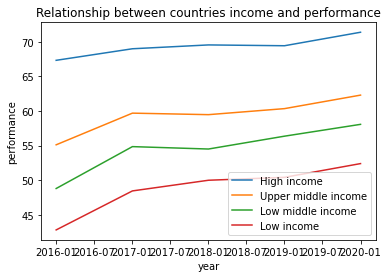

In [93]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=hi_df, label="High income")
plt.plot("ds", "score", data=umi_df, label="Upper middle income")
plt.plot("ds", "score", data=lmi_df, label="Low middle income")
plt.plot("ds", "score", data=li_df, label="Low income")
plt.title("Relationship between countries income and performance")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend()

### Creating dataframe with regions

In [95]:
northern_africa = ["Algeria", "Egypt", "Egypt, Arab Rep.", "Libya", "Morocco", "Sudan", "Tunisia", "Western Sahara"]
eastern_africa = ["British Indian Ocean Territory", "Burundi", "Comoros", "Djibouti", "Eritrea", "Ethiopia", "French Southern Territories", "Kenya", "Madagascar", "Malawi", "Mauritius", "Mayotte", "Mozambique","Réunion", "Rwanda", "Seychelles", "Somalia", "South Sudan", "Uganda", "United Republic of Tanzania", "Tanzania", "Zambia", "Zimbabwe"]
middle_africa = ["Angola", "Cameroon", "Central African Republic", "Chad", "Congo, Dem. Rep.", "Congo, Rep.","Democratic Republic of the Congo", "Equatorial Guinea", "Gabon", "Sao Tome and Principe"]
southern_africa = ["Swaziland","Botswana", "Eswatini", "Lesotho", "Namibia", "South Africa"]
western_africa = ["Benin", "Burkina Faso", "Cabo Verde", "Côte d’Ivoire", "Cote d'Ivoire", "Gambia, The", "Ghana", "Guinea", "Guinea-Bissau","Liberia", "Mali", "Mauritania", "Niger", "Nigeria", "Saint Helena", "Senegal", "Sierra Leone", "Togo"]
latin_am_caribbean = ["Anguilla", "Antigua and Barbuda", "Aruba", "Bahamas", "Barbados", "Bonaire", "British Virgin Islands", "Cayman Islands", "Cuba", "Curaçao", "Dominica","Dominican Republic", "Grenada", "Guadeloupe", "Haiti", "Jamaica", "Martinique", "Montserrat","Puerto Rico", "Saint Barthélemy", "Saint Kitts and Nevis", "Saint Lucia", "Saint Martin (French Part)", "Saint Vincent and the Grenadines", "Samoa","Sint Maarten (Dutch part)", "Trinidad and Tobago","Turks and Caicos Islands", "United States Virgin Islands","Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Mexico", "Nicaragua","Panama","Argentina", "Bolivia", "Bouvet Island", "Brazil", "Chile","Colombia", "Ecuador", "Falkland Islands (Malvinas)", "French Guiana", "Guyana", "Paraguay", "Peru","South Georgia and the South Sandwich Islands", "Suriname", "Uruguay", "Venezuela, RB", "Venezuela"]
north_america = ["Bermuda", "Canada", "Greenland", "Saint Pierre and Miquelon", "United States"]
central_asia = ["Kazakhstan", "Kyrgyzstan", "Kyrgyz Republic","Tajikistan", "Turkmenistan", "Uzbekistan"]
east_asia = ["China", "Hong Kong" , "Korea, Rep.", "Korea, Dem. Rep.", "Japan", "Mongolia"]
southeast_asia = ["Brunei Darussalam", "Cambodia", "Indonesia", "Lao PDR", "Malaysia","Myanmar", "Philippines", "Singapore", "Thailand", "Timor-Leste", "Vietnam"]
southern_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Iran, Islamic Rep.", "Maldives", "Nepal","Pakistan", "Sri Lanka"]
western_asia = ["Armenia", "Azerbaijan", "Bahrain", "Cyprus", "Georgia", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon","Oman", "Qatar", "Saudi Arabia", "State of Palestine", "Syrian Arab Republic", "Turkey", "United Arab Emirates", "Yemen","Yemen, Rep."]
east_europe = ["Belarus", "Bulgaria", "Czech Republic", "Hungary", "Poland", "Republic of Moldova", "Moldova","Romania","Russian Federation", "Slovakia", "Slovak Republic", "Ukraine"]
north_europe = ["Åland Islands", "Channel Islands (Guernsey, Jersey, Sark)", "Denmark", "Estonia", "Faroe Islands","Finland", "Iceland", "Ireland", "Isle of Man", "Latvia", "Lithuania", "Norway", "Svalbard and Jan Mayen Islands", "Sweden", "United Kingdom", "Ireland"]
south_europe = ["Albania", "Andorra", "Bosnia and Herzegovina", "Croatia", "Gibraltar", "Greece", "Holy See", "Italy","Malta", "Montenegro", "Portugal", "San Marino", "Serbia", "Slovenia", "Spain", "Macedonia, FYR", "Former Yugoslav Republic of Macedonia (FYROM)"]
western_europe = ["Austria", "Belgium", "France", "Germany", "Liechtenstein", "Luxembourg", "Monaco", "Netherlands","Switzerland"]
oceania = ["Australia", "Christmas Island", "Cocos (Keeling) Islands", "Heard Island and McDonald Islands","New Zealand", "Norfolk Island", "Fiji", "New Caledonia", "Papua New Guinea", "Solomon Islands", "Vanuatu", "Guam", "Kiribati", "Marshall Islands", "Micronesia (Federated States of)", "Nauru", "Northern Mariana Islands", "Palau", "United States Minor Outlying Islands"]


In [96]:
# Labeling the countries in 2016 dataset
cond=[df16["countryname"].isin(northern_africa),df16['countryname'].isin(eastern_africa),df16['countryname'].isin(middle_africa),df16['countryname'].isin(southern_africa),
     df16['countryname'].isin(western_africa), df16['countryname'].isin(latin_am_caribbean), df16['countryname'].isin(north_america),
     df16['countryname'].isin(central_asia), df16['countryname'].isin(east_asia), df16['countryname'].isin(southeast_asia), df16['countryname'].isin(southern_asia),
     df16['countryname'].isin(western_asia), df16['countryname'].isin(east_europe), df16['countryname'].isin(north_europe), df16['countryname'].isin(south_europe), 
     df16['countryname'].isin(western_europe), df16['countryname'].isin(oceania)]
values=['north_af','east_af','mid_af','south_af', "west_afr","lat_cab", "north_am", "cent_as", "east_as", "southeast_as", "south_as", "west_as", "east_eu", "nor_eu", "sou_eu", "wes_eu", "oceania"]
df16['region']=np.select(cond,values)

In [97]:
# Labeling the countries in 2017 dataset
cond=[df17["country"].isin(northern_africa),df17['country'].isin(eastern_africa),df17['country'].isin(middle_africa),df17['country'].isin(southern_africa),
     df17['country'].isin(western_africa), df17['country'].isin(latin_am_caribbean), df17['country'].isin(north_america),
     df17['country'].isin(central_asia), df17['country'].isin(east_asia), df17['country'].isin(southeast_asia), df17['country'].isin(southern_asia),
     df17['country'].isin(western_asia), df17['country'].isin(east_europe), df17['country'].isin(north_europe), df17['country'].isin(south_europe), 
     df17['country'].isin(western_europe), df17['country'].isin(oceania)]
values=['north_af','east_af','mid_af','south_af', "west_afr","lat_cab", "north_am", "cent_as", "east_as", "southeast_as", "south_as", "west_as", "east_eu", "nor_eu", "sou_eu", "wes_eu", "oceania"]
df17['region']=np.select(cond,values)

In [98]:
# Labeling the countries in 2018 dataset
cond=[df18["country"].isin(northern_africa),df18['country'].isin(eastern_africa),df18['country'].isin(middle_africa),df18['country'].isin(southern_africa),
     df18['country'].isin(western_africa), df18['country'].isin(latin_am_caribbean), df18['country'].isin(north_america),
     df18['country'].isin(central_asia), df18['country'].isin(east_asia), df18['country'].isin(southeast_asia), df18['country'].isin(southern_asia),
     df18['country'].isin(western_asia), df18['country'].isin(east_europe), df18['country'].isin(north_europe), df18['country'].isin(south_europe), 
     df18['country'].isin(western_europe), df18['country'].isin(oceania)]
values=['north_af','east_af','mid_af','south_af', "west_afr","lat_cab", "north_am", "cent_as", "east_as", "southeast_as", "south_as", "west_as", "east_eu", "nor_eu", "sou_eu", "wes_eu", "oceania"]
df18['region']=np.select(cond,values)

In [99]:
# Labeling the countries in 2019 dataset
cond=[df19["Country"].isin(northern_africa),df19['Country'].isin(eastern_africa),df19['Country'].isin(middle_africa),df19['Country'].isin(southern_africa),
     df19['Country'].isin(western_africa), df19['Country'].isin(latin_am_caribbean), df19['Country'].isin(north_america),
     df19['Country'].isin(central_asia), df19['Country'].isin(east_asia), df19['Country'].isin(southeast_asia), df19['Country'].isin(southern_asia),
     df19['Country'].isin(western_asia), df19['Country'].isin(east_europe), df19['Country'].isin(north_europe), df19['Country'].isin(south_europe), 
     df19['Country'].isin(western_europe), df19['Country'].isin(oceania)]
values=['north_af','east_af','mid_af','south_af', "west_afr","lat_cab", "north_am", "cent_as", "east_as", "southeast_as", "south_as", "west_as", "east_eu", "nor_eu", "sou_eu", "wes_eu", "oceania"]
df19['region']=np.select(cond,values)

In [100]:
cond=[df20["Country"].isin(northern_africa),df20['Country'].isin(eastern_africa),df20['Country'].isin(middle_africa),df20['Country'].isin(southern_africa),
     df20['Country'].isin(western_africa), df20['Country'].isin(latin_am_caribbean), df20['Country'].isin(north_america),
     df20['Country'].isin(central_asia), df20['Country'].isin(east_asia), df20['Country'].isin(southeast_asia), df20['Country'].isin(southern_asia),
     df20['Country'].isin(western_asia), df20['Country'].isin(east_europe), df20['Country'].isin(north_europe), df20['Country'].isin(south_europe), 
     df20['Country'].isin(western_europe), df20['Country'].isin(oceania)]
values=['north_af','east_af','mid_af','south_af', "west_af","lat_cab", "north_am", "cent_as", "east_as", "southeast_as", "south_as", "west_as", "east_eu", "nor_eu", "sou_eu", "wes_eu", "oceania"]
df20['region']=np.select(cond,values)

__Africa__

Creating dataframe for __Northern Africa__

In [103]:
data_north_af = [['2016', df16[df16["region"] == "north_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "north_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "north_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "north_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "north_af"]["total_score"].median()]]
north_af_df = pd.DataFrame(data_north_af, columns = ['ds', 'score']) 

Creating dataframe for __East Africa__

In [104]:
data_east_af = [['2016', df16[df16["region"] == "east_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "east_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "east_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "east_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "east_af"]["total_score"].median()]]
east_af_df = pd.DataFrame(data_east_af, columns = ['ds', 'score']) 

Creating dataframe for __Middle Africa__

In [105]:
data_mid_af = [['2016', df16[df16["region"] == "mid_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "mid_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "mid_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "mid_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "mid_af"]["total_score"].median()]]
mid_af_df = pd.DataFrame(data_mid_af, columns = ['ds', 'score']) 

Creating dataframe for __South Africa__

In [106]:
data_south_af = [['2016', df16[df16["region"] == "south_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "south_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "south_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "south_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "south_af"]["total_score"].median()]]
south_af_df = pd.DataFrame(data_south_af, columns = ['ds', 'score']) 

Creating dataframe for __West Africa__

In [107]:
data_west_af = [['2016', df16[df16["region"] == "west_af"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "west_af"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "west_af"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "west_af"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "west_af"]["total_score"].median()]]
west_af_df = pd.DataFrame(data_west_af, columns = ['ds', 'score']) 

Plotting the __African performance__ by region

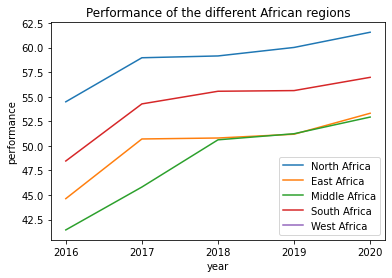

In [108]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=north_af_df, label="North Africa")
plt.plot("ds", "score", data=east_af_df, label="East Africa")
plt.plot("ds", "score", data=mid_af_df, label="Middle Africa")
plt.plot("ds", "score", data=south_af_df, label="South Africa")
plt.plot("ds", "score", data=west_af_df, label="West Africa")
plt.title("Performance of the different African regions")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend()

__America__

Creating dataframe for __Latin America and Caribbean__

In [109]:
data_latcab_am = [['2016', df16[df16["region"] == "lat_cab"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "lat_cab"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "lat_cab"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "lat_cab"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "lat_cab"]["total_score"].median()]]
latcab_df = pd.DataFrame(data_latcab_am, columns = ['ds', 'score']) 

Creating dataframe for __North America__

In [110]:
data_north_am = [['2016', df16[df16["region"] == "north_am"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "north_am"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "north_am"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "north_am"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "north_am"]["total_score"].median()]]
north_am_df = pd.DataFrame(data_north_am, columns = ['ds', 'score']) 

Plotting the __performance of America__

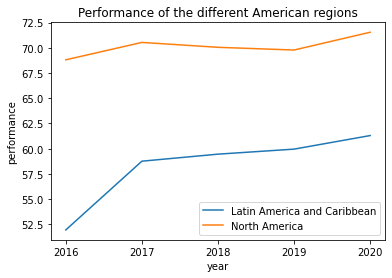

In [111]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=latcab_df, label="Latin America and Caribbean")
plt.plot("ds", "score", data=north_am_df, label="North America")
plt.title("Performance of the different American regions")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend();

__Asia__

Creating dataframe for __Center Asia__

In [112]:
data_cent_as = [['2016', df16[df16["region"] == "cent_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "cent_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "cent_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "cent_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "cent_as"]["total_score"].median()]]
cent_as_df = pd.DataFrame(data_cent_as, columns = ['ds', 'score']) 

Creating dataframe for __East Asia__

In [113]:
data_east_as = [['2016', df16[df16["region"] == "east_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "east_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "east_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "east_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "east_as"]["total_score"].median()]]
east_as_df = pd.DataFrame(data_east_as, columns = ['ds', 'score']) 

Creating dataframe for __Southeast Asia__

In [114]:
data_southeast_as = [['2016', df16[df16["region"] == "southeast_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "southeast_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "southeast_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "southeast_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "southeast_as"]["total_score"].median()]]
southeast_as_df = pd.DataFrame(data_southeast_as, columns = ['ds', 'score']) 

Creating dataframe for __South Asia__

In [115]:
data_south_as = [['2016', df16[df16["region"] == "south_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "south_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "south_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "south_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "south_as"]["total_score"].median()]]
south_as_df = pd.DataFrame(data_south_as, columns = ['ds', 'score']) 

Creating dataframe for __West Asia__

In [116]:
data_west_as = [['2016', df16[df16["region"] == "west_as"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "west_as"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "west_as"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "west_as"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "west_as"]["total_score"].median()]]
west_as_df = pd.DataFrame(data_west_as, columns = ['ds', 'score']) 

Plotting __Asia's performance__ by region

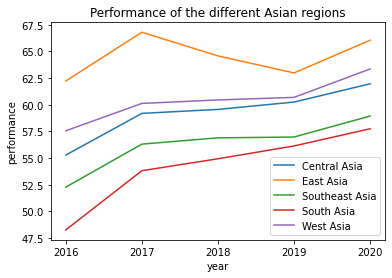

In [117]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=cent_as_df, label="Central Asia")
plt.plot("ds", "score", data=east_as_df, label="East Asia")
plt.plot("ds", "score", data=southeast_as_df, label="Southeast Asia")
plt.plot("ds", "score", data=south_as_df, label="South Asia")
plt.plot("ds", "score", data=west_as_df, label="West Asia")
plt.title("Performance of the different Asian regions")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend()

__Europe__

Creating dataframe for __Eastern Europe__

In [118]:
data_east_eu = [['2016', df16[df16["region"] == "east_eu"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "east_eu"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "east_eu"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "east_eu"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "east_eu"]["total_score"].median()]]
east_eu_df = pd.DataFrame(data_east_eu, columns = ['ds', 'score']) 

Creating dataframe for __Northern Europe__

In [119]:
data_north_eu = [['2016', df16[df16["region"] == "nor_eu"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "nor_eu"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "nor_eu"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "nor_eu"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "nor_eu"]["total_score"].median()]]
nor_eu_df = pd.DataFrame(data_north_eu, columns = ['ds', 'score']) 

Creating dataframe for __South Europe__

In [120]:
data_south_eu = [['2016', df16[df16["region"] == "sou_eu"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "sou_eu"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "sou_eu"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "sou_eu"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "sou_eu"]["total_score"].median()]]
sou_eu_df = pd.DataFrame(data_south_eu, columns = ['ds', 'score'])

Creating dataframe for __Western Europe__

In [121]:
data_west_eu = [['2016', df16[df16["region"] == "wes_eu"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "wes_eu"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "wes_eu"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "wes_eu"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "wes_eu"]["total_score"].median()]]
west_eu_df = pd.DataFrame(data_west_eu, columns = ['ds', 'score']) 

Plotting the __European performance by subregion__

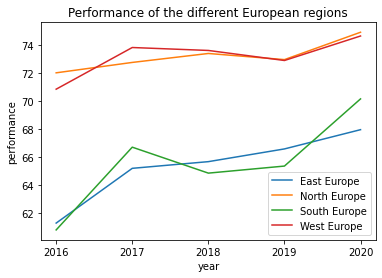

In [122]:
f, ax = plt.subplots(1, 1)
plt.plot("ds", "score", data=east_eu_df, label="East Europe")
plt.plot("ds", "score", data=nor_eu_df, label="North Europe")
plt.plot("ds", "score", data=sou_eu_df, label="South Europe")
plt.plot("ds", "score", data=west_eu_df, label="West Europe")
plt.title("Performance of the different European regions")
plt.xlabel("year")
plt.ylabel("performance")
ax.legend();

Creating dataframe for __Oceania__

In [123]:
data_oceania = [['2016', df16[df16["region"] == "oceania"]["total_score"].median()], 
        ['2017', df17[df17["region"] == "oceania"]["total_score"].median()], 
        ['2018', df18[df18["region"] == "oceania"]["total_score"].median()], 
        ['2019', df19[df19["region"] == "oceania"]["total_score"].median()], 
        ['2020', df20[df20["region"] == "oceania"]["total_score"].median()]]
oceania_df = pd.DataFrame(data_oceania, columns = ['ds', 'score']) 

## Global achievement per goal

In [124]:
data_global_sdg = [['sdg1', df20["sdg1_score"].median()], 
        ['sdg2', df20["sdg2_score"].median()], 
        ['sdg3', df20["sdg3_score"].median()], 
        ['sdg4', df20["sdg4_score"].median()], 
        ['sdg5', df20["sdg5_score"].median()],
        ['sdg6', df20["sdg6_score"].median()], 
        ['sdg7', df20["sdg7_score"].median()], 
        ['sdg8', df20["sdg8_score"].median()], 
        ['sdg9', df20["sdg9_score"].median()],
        ['sdg10', df20["sdg10_score"].median()], 
        ['sdg11', df20["sdg11_score"].median()], 
        ['sdg12', df20["sdg12_score"].median()], 
        ['sdg13', df20["sdg13_score"].median()],
        ['sdg14', df20["sdg14_score"].median()], 
        ['sdg15', df20["sdg15_score"].median()], 
        ['sdg16', df20["sdg16_score"].median()], 
        ['sdg17', df20["sdg17_score"].median()]]
sdg_global_df = pd.DataFrame(data_global_sdg, columns = ['sdg', 'performance']).sort_values("performance")

Text(0, 0.5, 'goal')

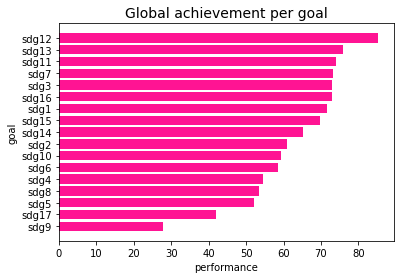

In [126]:
f, ax = plt.subplots(1, 1)
plt.barh("sdg", "performance", data=sdg_global_df, color="deeppink")
plt.title("Global achievement per goal", fontsize = 14)
plt.xlabel("performance")
plt.ylabel("goal")

# Forecasting model

In [127]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [175]:
# Global prediction
m = Prophet(seasonality_mode='additive', yearly_seasonality=True, interval_width=0.8, n_changepoints=2)
m.fit(global_df)
future = m.make_future_dataframe(periods=10, freq="Y")

fcst = m.predict(future)
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
m.score()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,54.772961,54.772961,54.772961
1,2017-01-01,59.382408,59.382408,59.382408
2,2018-01-01,59.228779,59.228779,59.228779
3,2019-01-01,59.546029,59.546029,59.546029
4,2020-01-01,61.425798,61.425798,61.425798
5,2020-12-31,63.786897,63.616483,63.928003
6,2021-12-31,66.632079,65.815373,67.360717
7,2022-12-31,69.963201,68.362334,71.365087
8,2023-12-31,73.781225,71.094376,76.094939
9,2024-12-31,73.692575,69.938220,77.034345


Text(0.5, 1.0, 'Global prediction for SDGs achievement by 2030')

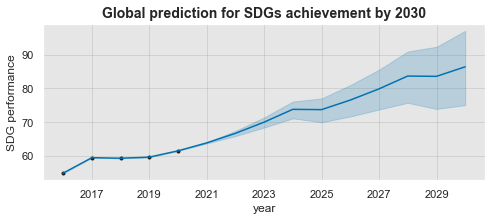

In [176]:
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
fig = m.plot(fcst, figsize=(7,3), ylabel="SDG performance", xlabel="year")
plt.title("Global prediction for SDGs achievement by 2030", fontsize=14, fontweight="bold")

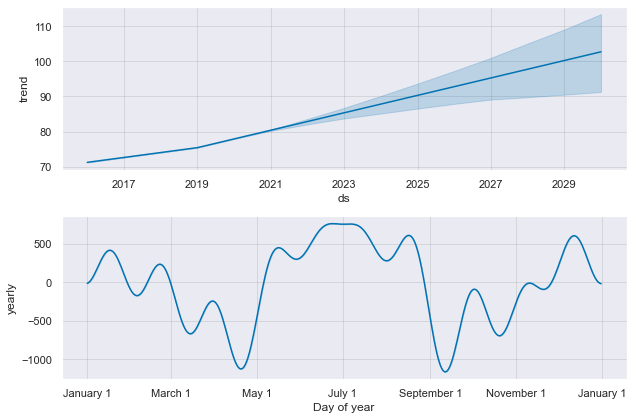

In [177]:
sns.set_style("dark")
fig2 = m.plot_components(fcst)

In [178]:
#Validating the model with the first 3 years

In [179]:
global_df_test = global_df.loc[0:2]

In [180]:
m = Prophet(seasonality_mode='additive', yearly_seasonality=True, interval_width=0.95)
m.fit(global_df_test)
future = m.make_future_dataframe(periods=2, freq="Y")

fcst_test = m.predict(future)
fcst_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,54.772961,54.772961,54.772961
1,2017-01-01,59.382408,59.382408,59.382408
2,2018-01-01,59.228779,59.228779,59.228779
3,2018-12-31,54.921476,54.921476,54.921476
4,2019-12-31,55.086256,55.086254,55.086257


In [181]:
y_col = global_df["y"]
fcst_test["y"] = y_col

In [182]:
fcst_test = fcst_test.loc[:, ["ds", "y", "trend", "yhat", "yhat_upper", "yhat_lower"]]

In [183]:
print("MAE yhat\t: {}\nMAE trend\t: {}\nMAE yhat_lower: {}\nMAE yhat_upper: {}".format(
    mean_absolute_error(fcst_test['y'].values,fcst_test['yhat']),
    mean_absolute_error(fcst_test['y'].values,fcst_test['trend']),
    mean_absolute_error(fcst_test['y'].values,fcst_test['yhat_lower']),
    mean_absolute_error(fcst_test['y'].values,fcst_test['yhat_upper'])))

MAE yhat	: 2.1928190817708284
MAE trend	: 15.148599574422837
MAE yhat_lower: 2.19281939862705
MAE yhat_upper: 2.1928188145389327


In [184]:
print("RMSE yhat\t: {}\nRMSE trend\t: {}\nRMSE yhat_lower: {}\nRMSE yhat_upper: {}".format(
    mean_squared_error(fcst_test['y'].values,fcst_test['yhat']),
    mean_squared_error(fcst_test['y'].values,fcst_test['trend']),
    mean_squared_error(fcst_test['y'].values,fcst_test['yhat_lower']),
    mean_squared_error(fcst_test['y'].values,fcst_test['yhat_upper'])))

RMSE yhat	: 12.31525746951265
RMSE trend	: 230.83376687440614
RMSE yhat_lower: 12.315261210615011
RMSE yhat_upper: 12.315254298010192


In [200]:
# Training the model with 3 years and predicting until 2030
m = Prophet(seasonality_mode='additive', yearly_seasonality=True, interval_width=0.95)
m.fit(global_df_test)
future = m.make_future_dataframe(periods=12, freq="Y")

fcst_test_val = m.predict(future)
fcst_test_val[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,54.772961,54.772961,54.772961
1,2017-01-01,59.382408,59.382408,59.382408
2,2018-01-01,59.228779,59.228779,59.228779
3,2018-12-31,54.921476,54.921476,54.921476
4,2019-12-31,55.086256,55.086254,55.086257
5,2020-12-31,59.058010,59.058008,59.058013
6,2021-12-31,59.106718,59.106715,59.106722
7,2022-12-31,59.212353,59.212349,59.212358
8,2023-12-31,59.377133,59.377127,59.377139
9,2024-12-31,63.348887,63.348881,63.348895


In [201]:
global_df_test4 = global_df.loc[0:3]

In [199]:
# Training the model with 4 years and predicting until 2030
m = Prophet(seasonality_mode='additive', yearly_seasonality=True, interval_width=0.95)
m.fit(global_df_test4)
future = m.make_future_dataframe(periods=11, freq="Y")

fcst_test_val4 = m.predict(future)
fcst_test_val4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,54.772961,54.772961,54.772961
1,2017-01-01,59.382408,59.382408,59.382408
2,2018-01-01,59.228779,59.228778,59.228779
3,2019-01-01,59.546029,59.546029,59.546029
4,2019-12-31,63.343894,63.299380,63.379728
5,2020-12-31,61.736392,61.605691,61.847980
6,2021-12-31,63.602514,63.387716,63.796962
7,2022-12-31,65.976358,65.657092,66.275113
8,2023-12-31,68.852068,68.428982,69.254479
9,2024-12-31,67.244565,66.706829,67.765965


In [202]:
# Creating df to plot both predictions
yhat_pred = fcst["yhat"]
yhat_test3 = fcst_test_val["yhat"]
yhat_test4 = fcst_test_val4["yhat"]
ds = fcst["ds"]
val_df = pd.concat([ds, yhat_pred, yhat_test3, yhat_test4], axis=1)
val_df.columns = ["ds", "yhat_pred", "yhat_test3", "yhat_test4"]

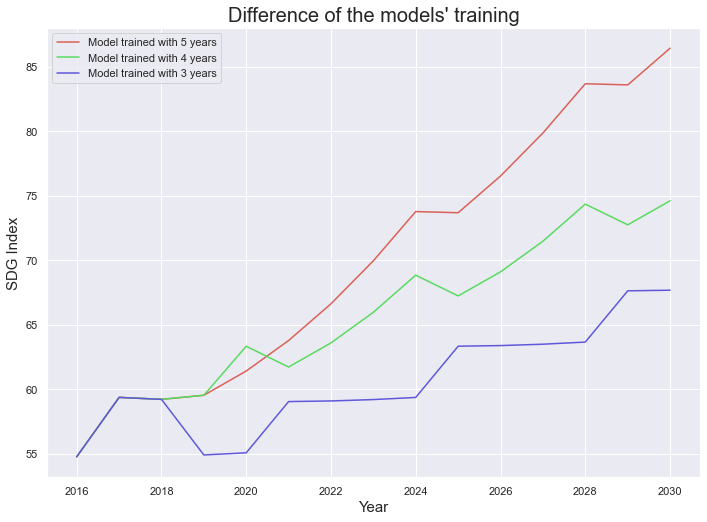

In [203]:
# Plotting the difference
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("hls", n_colors=3)
labels=["Model trained with 5 years", "Model trained with 4 years", "Model trained with 3 years"]
sns.lineplot(x = "ds", y = "yhat_pred", data = val_df, 
            dashes = False, markers = ["o", "<"],  legend="brief",)
sns.lineplot(x = "ds", y = "yhat_test4", data = val_df, dashes = False, 
            markers = ["o", "<"],  legend="brief")
sns.lineplot(x = "ds", y = "yhat_test3", data = val_df)
plt.title("Difference of the models' training", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("SDG Index", fontsize = 15)
plt.legend(labels)
plt.show()

In [204]:
msq = mean_squared_error(val_df['yhat_pred'].values,val_df['yhat_test4'])
print("Mean squared error is:", msq)

Mean squared error is: 37.91474601178088


In [205]:
mae = mean_absolute_error(val_df['yhat_pred'].values,val_df['yhat_test4'])
print("Mean absolute error is:", mae)

Mean absolute error is: 4.678022690382667
